In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c6e59a5d30>,
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c6e59ce460>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date_str = recent_date_str[0]
recent_date_str

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = datetime.strptime(recent_date_str, '%Y-%m-%d').date()
year_prior = recent_date - relativedelta(years=1)
year_prior_string = year_prior.strftime("%Y-%m-%d")

In [84]:
precip = session.query(Measurement.date, func.sum(Measurement.prcp)).filter(Measurement.prcp>0).group_by(Measurement.date).all()

In [85]:
precip

[('2010-01-01', 1.06),
 ('2010-01-02', 0.02),
 ('2010-01-04', 0.01),
 ('2010-01-05', 0.03),
 ('2010-01-06', 0.5800000000000001),
 ('2010-01-07', 1.65),
 ('2010-01-08', 0.06),
 ('2010-01-09', 0.02),
 ('2010-01-10', 0.02),
 ('2010-01-11', 0.8800000000000001),
 ('2010-01-12', 0.02),
 ('2010-01-13', 0.02),
 ('2010-01-20', 0.01),
 ('2010-01-21', 0.65),
 ('2010-01-24', 0.02),
 ('2010-01-26', 0.25),
 ('2010-01-27', 1.6),
 ('2010-01-28', 0.73),
 ('2010-01-29', 2.19),
 ('2010-01-30', 7.3500000000000005),
 ('2010-01-31', 2.16),
 ('2010-02-01', 0.05),
 ('2010-02-02', 0.05),
 ('2010-02-03', 3.21),
 ('2010-02-04', 0.02),
 ('2010-02-05', 0.16),
 ('2010-02-06', 0.12),
 ('2010-02-07', 0.01),
 ('2010-02-12', 0.8200000000000001),
 ('2010-02-13', 0.78),
 ('2010-02-14', 0.03),
 ('2010-02-17', 0.06),
 ('2010-02-19', 0.69),
 ('2010-02-20', 1.61),
 ('2010-02-21', 0.22000000000000003),
 ('2010-02-22', 1.23),
 ('2010-02-23', 0.03),
 ('2010-02-24', 0.01),
 ('2010-02-25', 0.02),
 ('2010-02-26', 0.02),
 ('2010-02

In [13]:
# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date>=year_prior_string).\
    order_by(Measurement.date).all()
year_data

[(0.0, '2016-08-23'),
 (0.15, '2016-08-23'),
 (0.05, '2016-08-23'),
 (None, '2016-08-23'),
 (0.02, '2016-08-23'),
 (1.79, '2016-08-23'),
 (0.7, '2016-08-23'),
 (0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip = []
date = []

for data in year_data:
    if type(data[0]) == float:
        precip.append(data[0])
        date.append(data[1])
        
precipitation = pd.DataFrame({"Precipitation": precip,
                              "Date":date})
precipitation["Date"] = precipitation["Date"].astype("string")
precipitation = precipitation.groupby("Date").sum()

precipitation.head()

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32


In [15]:
precipitation = pd.DataFrame({"Precipitation": precip,
                              "Date":date})
precipitation["Date"] = precipitation["Date"].astype("string")
precipitation = precipitation.groupby("Date").sum()

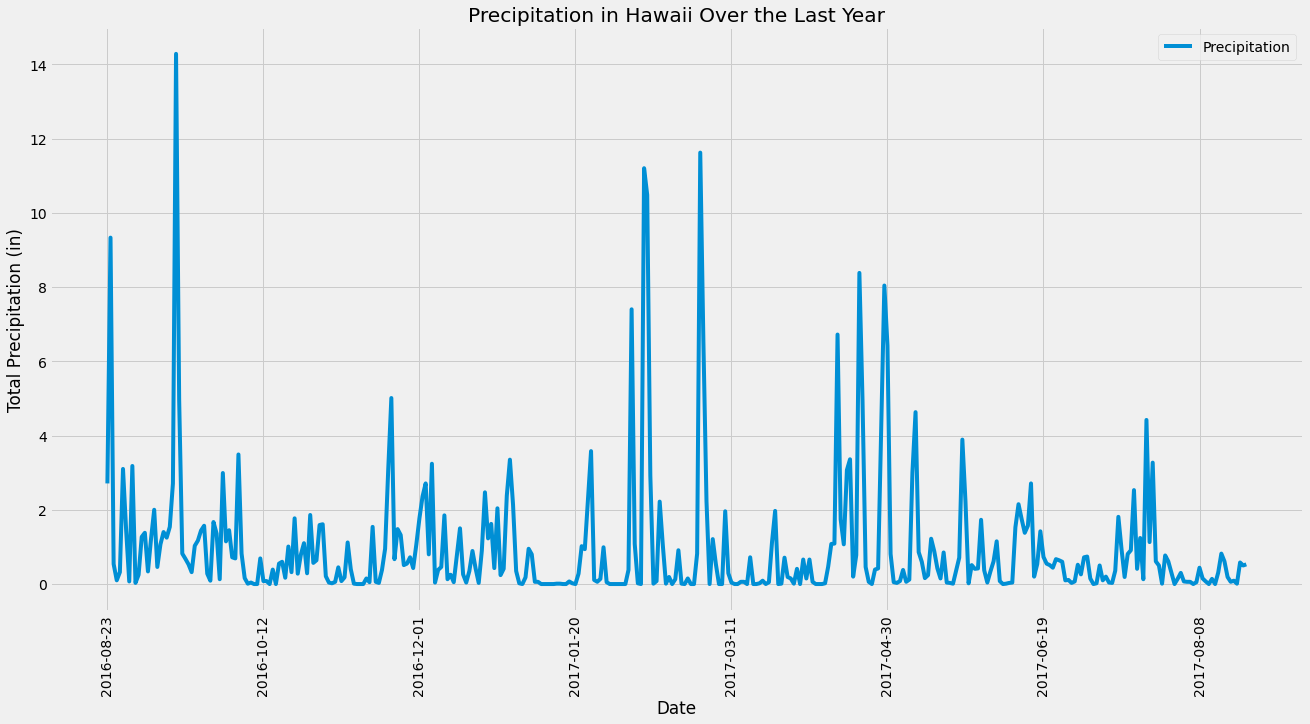

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precipitation.plot(rot=90, figsize=(20, 10), title="Precipitation in Hawaii Over the Last Year", ylabel="Total Precipitation (in)")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Measurement.station).distinct().all()
print(f"Total number of stations in dataset: {len(num_stations)}")

Total number of stations in dataset: 9


In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
most_active_station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
print(f"Most Active Station ({most_active_station}) Stats:\nLowest Temp: {most_active_station_stats[0][0]}\nHighest Temp: {most_active_station_stats[0][1]}\nAverage Temp: {round(most_active_station_stats[0][2],2)}")

Most Active Station (USC00519281) Stats:
Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp: 71.66


In [69]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_most_active_station = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date>=year_prior_string).all()
flattened_temps = [x[0] for x in year_most_active_station]

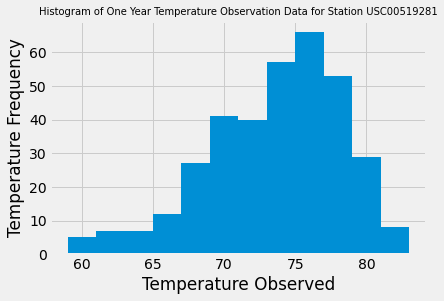

In [74]:
plt.hist(flattened_temps, bins=12)
plt.title(f"Histogram of One Year Temperature Observation Data for Station {most_active_station}", size=10)
plt.xlabel("Temperature Observed")
plt.ylabel("Temperature Frequency")
plt.show()

# Close session

In [75]:
# Close Session
session.close()